<br>

## What is Entropy ?

Albert Kao

<br>

Entropy has always been a somewhat baffling concept. Students with science majors all took classes in thermodynamics, but many still could not clearly explain what entropy is. The word entropy carried a notion that it is abstract, and can only be understood by the smartest. I do not think this is true. Some of the misconceptions about entropy was due to historical reasons and how the idea was formulated. Here I try to explain entropy in simple terms, and add code examples to show how entropy is used in physics and information theory.  

<br>

### 1. Entropy in Physics 

<br>

In physics, entropy is a value proportional to the logarithm of possible arrangements of a system. A system in equilibrium is likely to be in a macrostate with many possible arrangements of particles and energy. The equation for entropy denoted $S$:

\begin{equation*}
S \equiv k_b \ln{\Omega}
\end{equation*}

where $k_b$ is Boltzmann constant, and $\Omega$ represents the number of microstates. This idea can be introduced by an example. Assume a system at constant temperature with total particles and total energy fixed. Now we want to know the energy distribution of particles when system reaches equilibrium. Detailed derivation to this problem can be found in multiple textbooks [1,2], and I will not repeat here. To be brief, by calculating the distribution with highest number of microstates under several constraints, the equilibrium energy distribution is a Boltzmann distribution: 

\begin{equation*}
N_i \propto e^{-E_i/k_bT}
\end{equation*}

where number of particles $N_i$ with energy $E_i$ is proportional to $e^{-E_i/k_bT}$. The equilibrium distribution  is exponential may seem counterintuitive at first, indeed, it is the macrostate with most number of microstates [3]. Similarly, we can set up a simulation where each particle starts with same amount of energy (10 units). Particles can randomly gain or lose energy one unit at a time, but total energy of all particles is fixed at all times. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
E = 10

energies = np.repeat(E, N) # energy of each particle

The **energies** array holds the energy for each particle. In the beginning all particles share the same value. 

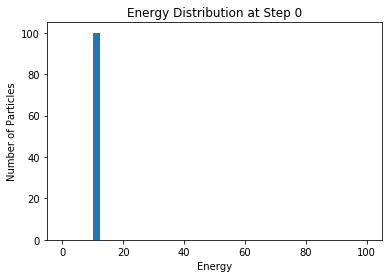

In [22]:
# print(energies)

plt.hist(energies, bins=40, range=(0, 100)) 
plt.title("Energy Distribution at Step 0")
plt.xlabel("Energy")
plt.ylabel("Number of Particles")
plt.show()

After first hundreds or so steps, energy distribution will resemble a normal distribution. In early stages the process for each particle is similar to a random walk on X axis. After that, energy distribution will gradually become an expoenetial distribution. One way to explain why equilibrium distribution is exponential is because the process is bounded at $E=0$. In other words, particles cannot have negative energy. When a particle has zero energy it is said to be in ground state, and can only transition to a state with higher energy.  

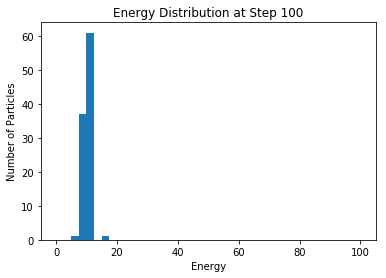

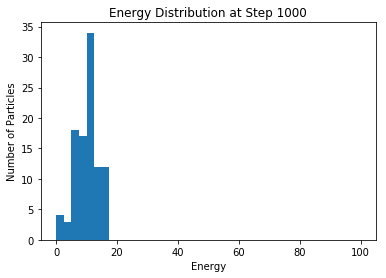

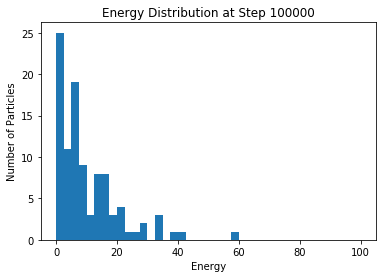

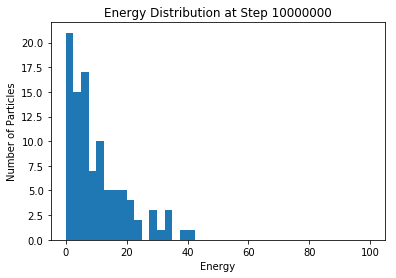

In [23]:
steps = 10000000


for i in range(steps+1):
    
    if i in [100, 1000, 100000, 1000000, 10000000]:       
        plt.hist(energies, bins=40, range=(0, 100)) 
        plt.title("Energy Distribution at Step " + str(i))
        plt.xlabel("Energy")
        plt.ylabel("Number of Particles")
        plt.show()
    
    [p1, p2] = np.random.choice(N, 2, replace=False)  
    
    if energies[p1] == 0:
        continue
    
    energies[p1] -= 1
    energies[p2] += 1

With above simulation we loosely verified the energy equilibrium distribution for a system with fixed particles and fixed energy under constant temperature is an exponential distribution. Exponential distribution is the most likely macrostate because it has the most number of possible arrangements for particles and energy. While this is just one case, we demonstrated that if given the freedom, a system will rearrange itself and transition to the macrostate with highest entropy. In statistical mechanics, the entropy was also written in another form, called Gibbs Entropy:

\begin{equation*}
S = - k_b \sum_i P_i \ln{P_i}
\end{equation*}

where $P_i$ represents the probability of observing each state. If we skip calculating the microstates for use numbers for each macrostates and calculate its probability of being observed, the value for entropy will be the same as the one defined early, with only a constant difference.   

<br>

### 2. Entropy in Information Theory 

<br>

In information theory, entropy is an uncertainty measure. It also represents the information conveyed after observation of a random process. A rare event has high information, while a common event has low information. For example, observing a coin flip with both sides being heads does not carry any information. The equation that represent entropy in information theory denoted $H$: 

\begin{equation*}
H = - \sum_i P_i \log_2{P_i}
\end{equation*}

$P_i$ is the probability of observing outcome $i$. $H$ is also called Shannon Entropy, named after its author Claude Shannon. The unit for Shannon Entropy is bits. For example, flipping a fair coin once yields 1 bit of information. Entropy in information theory was developed from a different perspective than physics. The argument and proof for formulating the equation to describe uncertainty can be found elsewhere [2,3], but I will  list the three conditions needed to formulate $H$:
1. $H$ is a continuous function of $P_i$
2. If all $P_i$'s = 1/n, $H$ is a monotonous increasing function of n.
3. If possbile outcomes of observations depend on subsequent observations, $H$ is sum of uncertainty of subsequent observations.  

Next, we can calculate the entropy for a random process which has three outcomes with probability $\frac{1}{2}$, $\frac{1}{3}$, and $\frac{1}{6}$ respectively. 

\begin{equation*}
H \Bigl(\frac{1}{2}, \frac{1}{3}, \frac{1}{6} \Bigr) = - \frac{1}{2} \times \log_2\frac{1}{2} - \frac{1}{3} \times \log_2\frac{1}{3} - \frac{1}{6} \times \log_2\frac{1}{6} = 1.46 \space bits
\end{equation*}

If we can only ask the system to give a sense of what this uncertainty means, I will present a calculation of yes no questions. 

In [20]:
(1/2) * np.log2(2) + (1/3) * np.log2(3) + (1/6) * np.log2(12)

1.6258145836939113

From the above, we verified $H$ can also be interpreted as "the minium average yes no questions required to determine result of one observation" [3]. I feel this explanation is great as it brings a deeper yet direct view of what uncertainty is. 

The connection between entropy in physics and entropy in information theory may not seem straighforward, but we can view the entropy in physics to represent missing information. 

### Reference 

1. Thermal Physics 
2. Classical and Statistical Thermodynamics by Ashely H. Carter
3. Information Theory by Robert Ash
